In [156]:
path = "./dataset/valid"

In [157]:
import json
 
f = open(path+"/_annotations.coco.json")
data = json.load(f)
 
# print(data["images"])
id_to_image_name = {}
for image in data["images"]:
    id_to_image_name[image["id"]] = image["file_name"]
print()
# print(id_to_image_name)


image_name_to_annotations = {}
for annotation in data["annotations"]:
    image_name_to_annotations[id_to_image_name[annotation["image_id"]]] = annotation
print()
# print(image_name_to_annotations)
f.close()

In [158]:
def parse_to_images(image):
    w, h = 512, 512
    data = np.zeros((h, w, 3), dtype=np.uint8)
    data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
    return Image.fromarray(image, 'RGB')

In [159]:
def show_top(images, top=10, annotations = None):
    for name, image in list(images.items())[:top]:
        fig, ax = plt.subplots()
        ax.imshow(image)
        plt.axis(False)
        if annotations is not None:
            print(name[:6])
            bbox = annotations[name]["bbox"]
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        plt.show()

f1-181


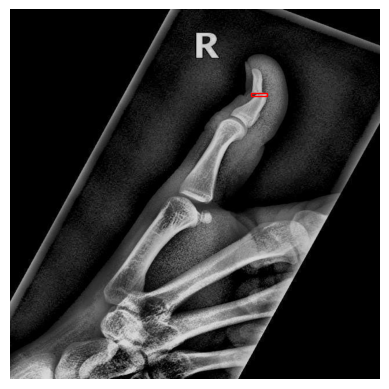

f1-184


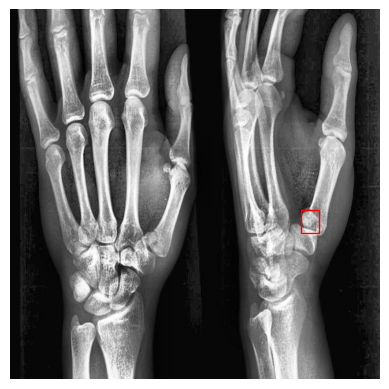

f1-197


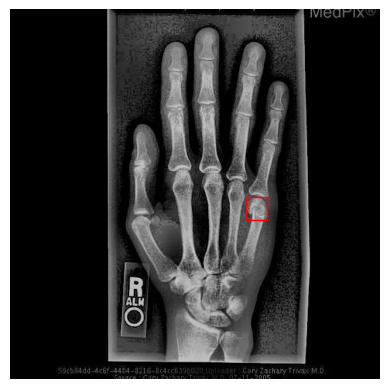

f1-208


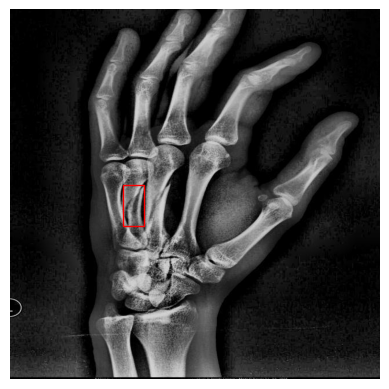

f1-209


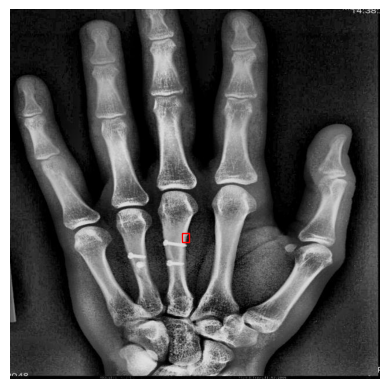

f1-216


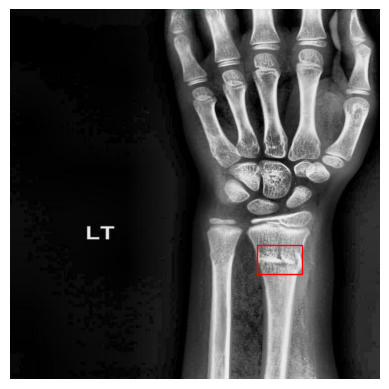

f1-218


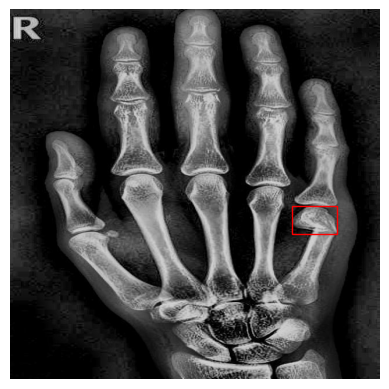

f1-220


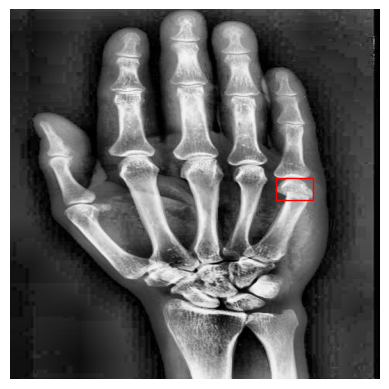

f1-221


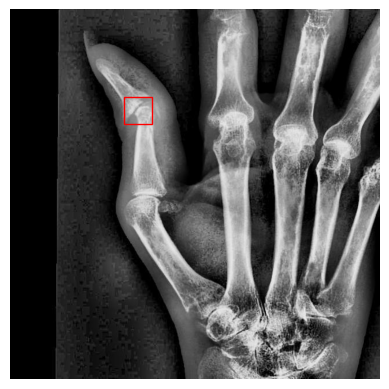

f1-222


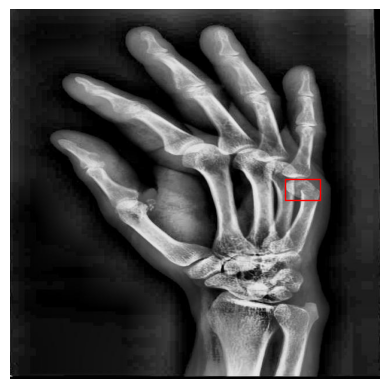

f1-24-


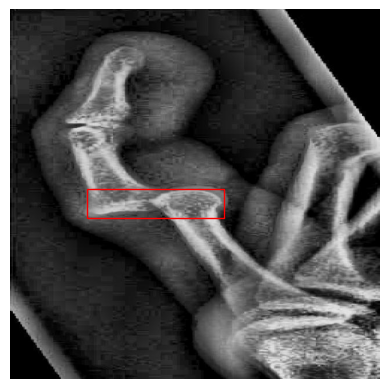

f1-26-


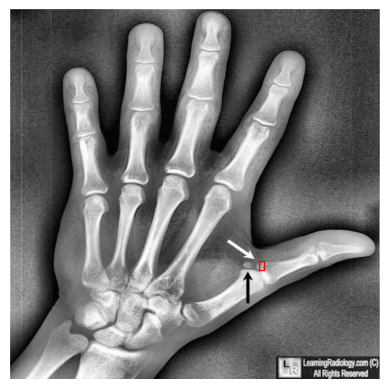

f1-27-


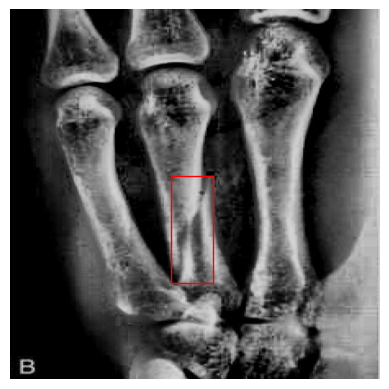

f1-35-


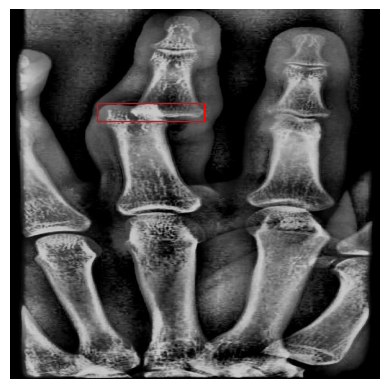

f1-41-


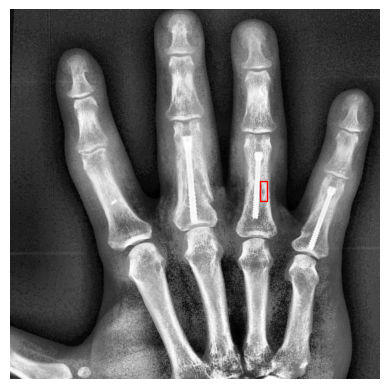

f1-45-


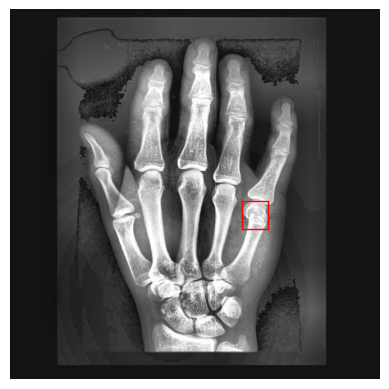

f1-48-


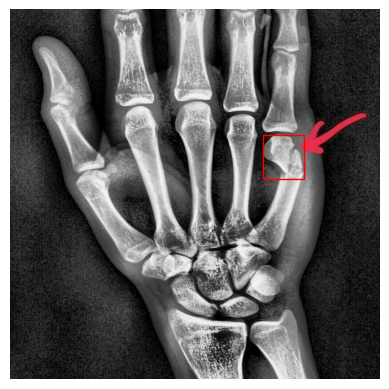

f1-50-


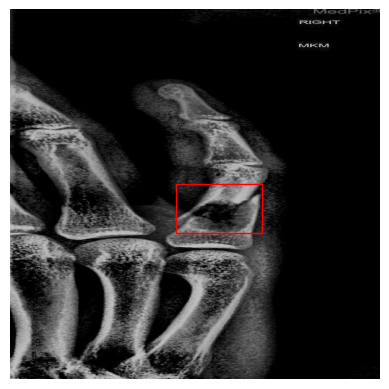

f1-52-


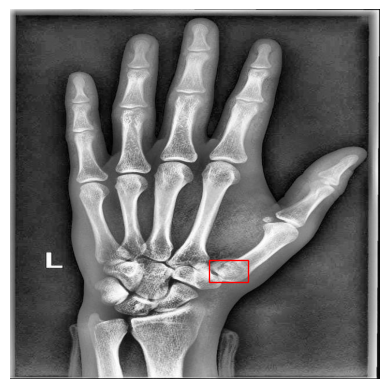

f1-56-


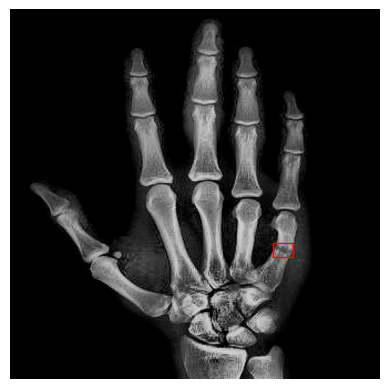

f1-61-


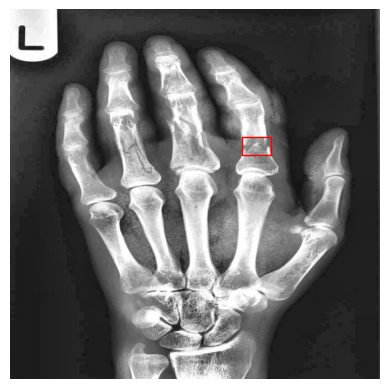

f1-66-


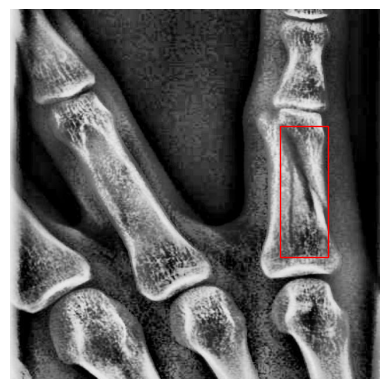

f1-7-_


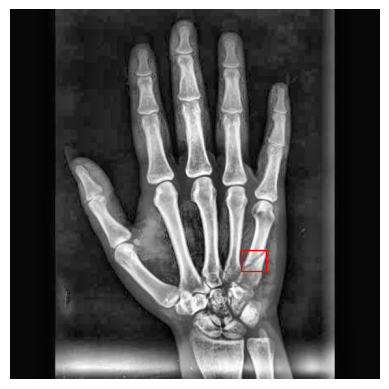

f1-71-


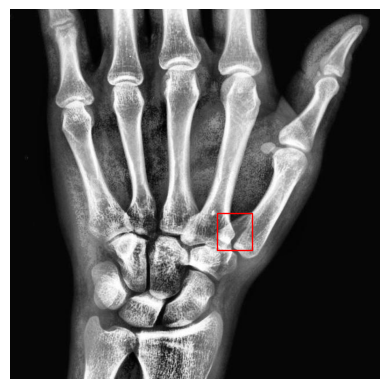

f1-73-


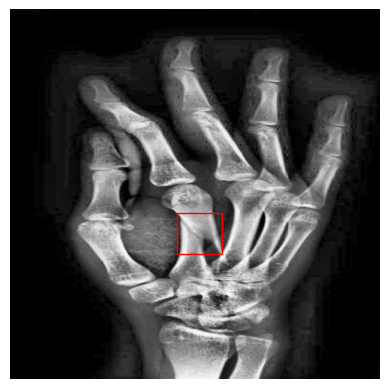

f1-75-


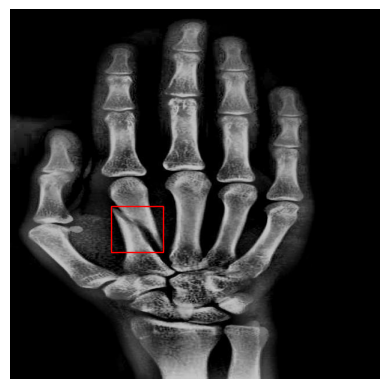

f1-77-


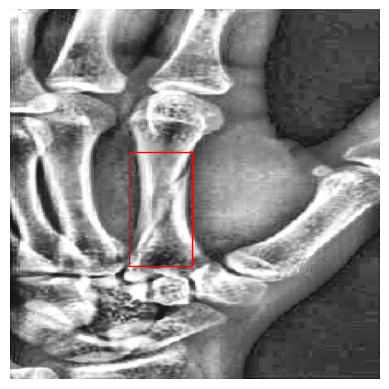

f1-79-


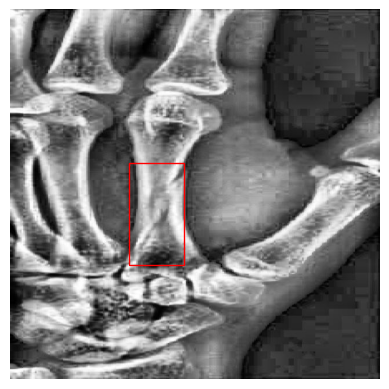

f1-8-_


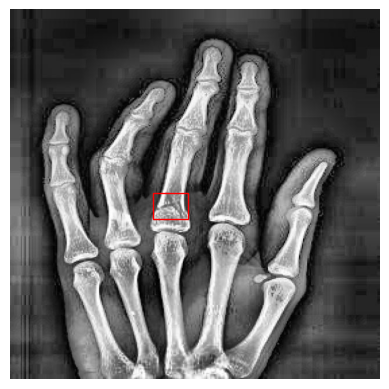

f1-80-


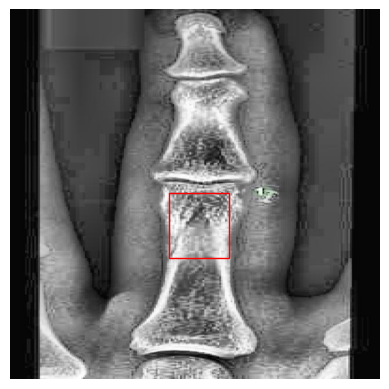

f1-81-


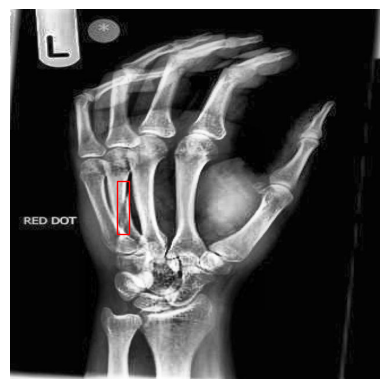

f1-82-


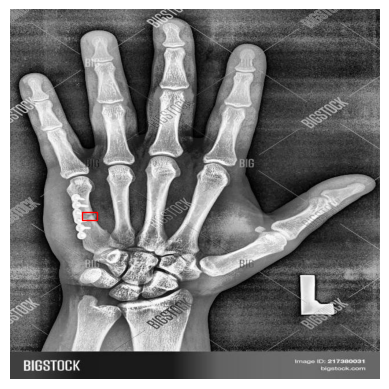

f1-84-


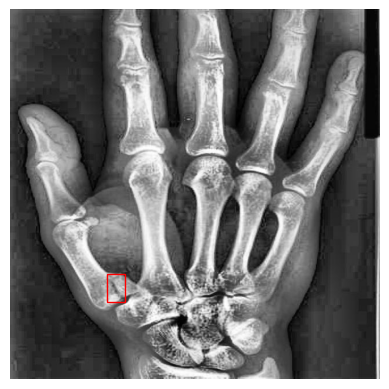

f1-85-


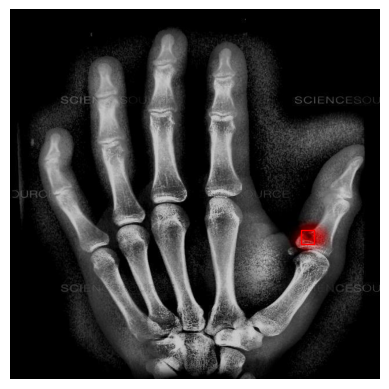

f1-86-


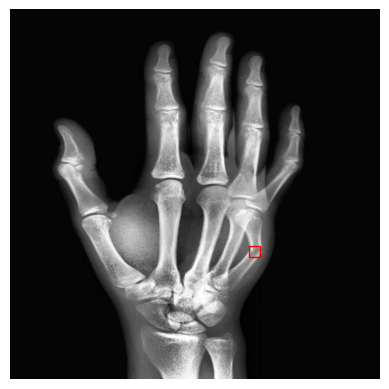

f1-88-


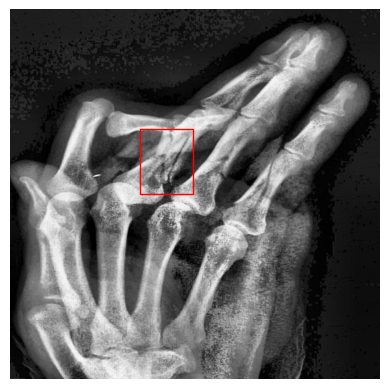

f1-89-


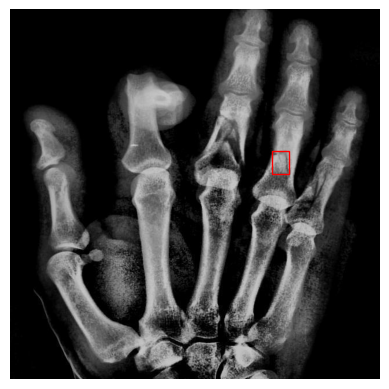

f1-90-


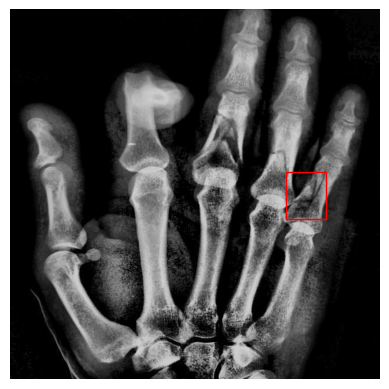

f1-92-


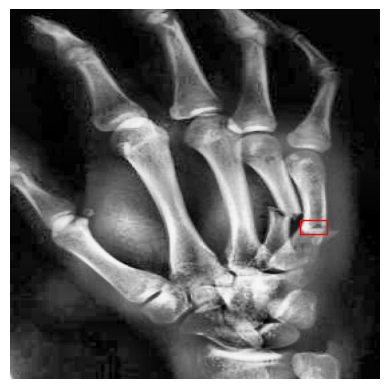

f1-94-


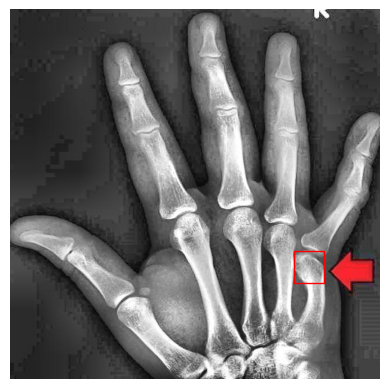

f1-95-


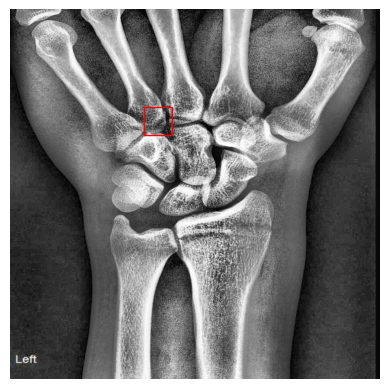

f1-96-


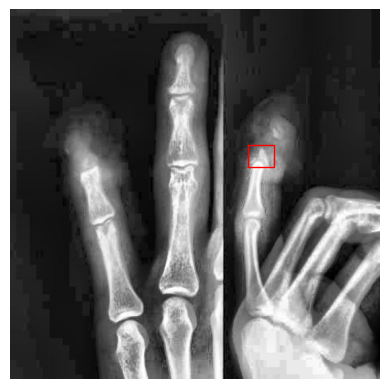

In [160]:
from PIL import Image
import glob
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
 
# images_arr = []
# images_names = []
images_arr = {}
for f in glob.iglob(path+"/*.jpg"):
    images_arr[f[16:]] = np.asarray(Image.open(f))
    # images_arr.append(np.asarray(Image.open(f)))
    # images_names.append(f[16:])
# images_arr = np.array(images_arr)

images = {}
for name, image_arr in images_arr.items():
    images[name] = parse_to_images(image_arr)
    

show_top(images, -1, image_name_to_annotations)